<a href="https://colab.research.google.com/github/hsyoongh/hg-mldl/blob/master/LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# 📌 필요한 패키지 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 📌 LeNet-5 모델 정의 (주석 포함)
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)     # C1: 1채널 입력 → 6채널 출력
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)    # C3: 6채널 입력 → 16채널 출력
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5)  # C5: 16채널 입력 → 120채널 출력
        self.fc1 = nn.Linear(120, 84)                   # F6: 120 → 84 Fully Connected
        self.fc2 = nn.Linear(84, 10)                    # Output: 84 → 10 (숫자 0~9)

    def forward(self, x):
        x = F.avg_pool2d(F.relu(self.conv1(x)), 2)  # C1 → ReLU → S2 (AvgPooling)
        x = F.avg_pool2d(F.relu(self.conv2(x)), 2)  # C3 → ReLU → S4 (AvgPooling)
        x = F.relu(self.conv3(x))                   # C5 → ReLU
        x = x.view(-1, 120)                         # Flatten: 120개의 노드로
        x = F.relu(self.fc1(x))                     # F6 → ReLU
        x = self.fc2(x)                             # Output Layer (Softmax는 loss 함수에 포함)
        return x

# 📌 데이터 전처리 (32x32로 리사이즈 후 텐서 변환)
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# 📌 MNIST 데이터셋 불러오기
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# 📌 장치 설정 (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📌 모델, 손실 함수, 옵티마이저 설정
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()  # CrossEntropy는 Softmax 포함
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 📌 학습 (1 에폭)
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()               # 기울기 초기화
        output = model(data)                # 순전파
        loss = criterion(output, target)    # 손실 계산
        loss.backward()                     # 역전파
        optimizer.step()                    # 가중치 업데이트
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}]  Loss: {loss.item():.6f}')

# 📌 테스트 정확도 측정 함수
def test(model, test_loader):
    model.eval()  # 평가 모드
    correct = 0
    total = 0
    with torch.no_grad():  # 역전파 비활성화
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)  # 가장 높은 확률 예측
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print(f'\nTest Accuracy: {100 * correct / total:.2f}%\n')

# 📌 테스트 실행
test(model, test_loader)


100%|██████████| 9.91M/9.91M [00:00<00:00, 129MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 20.2MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 72.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.43MB/s]


Train Epoch: 0 [0/60000]  Loss: 2.313375
Train Epoch: 0 [6400/60000]  Loss: 0.480422
Train Epoch: 0 [12800/60000]  Loss: 0.206851
Train Epoch: 0 [19200/60000]  Loss: 0.494071
Train Epoch: 0 [25600/60000]  Loss: 0.273738
Train Epoch: 0 [32000/60000]  Loss: 0.145600
Train Epoch: 0 [38400/60000]  Loss: 0.246205
Train Epoch: 0 [44800/60000]  Loss: 0.095242
Train Epoch: 0 [51200/60000]  Loss: 0.122963
Train Epoch: 0 [57600/60000]  Loss: 0.132372

Test Accuracy: 96.41%



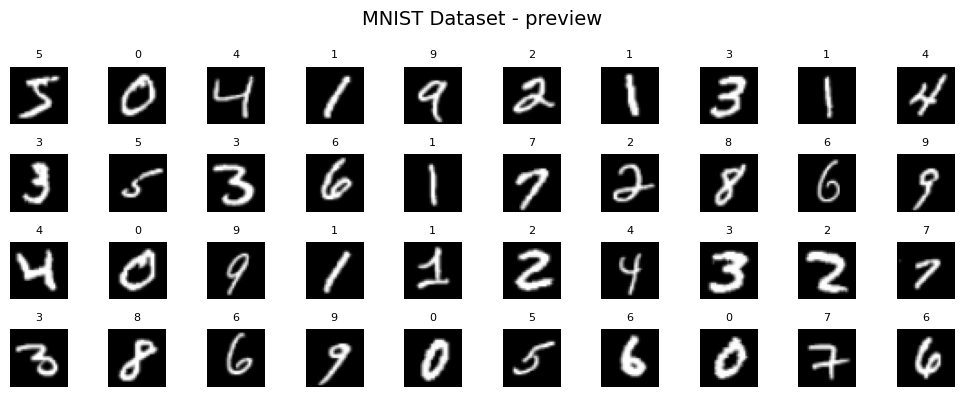

Epoch 1: Train Loss=0.3365, Val Loss=0.0965
Epoch 2: Train Loss=0.0925, Val Loss=0.0623
Epoch 3: Train Loss=0.0640, Val Loss=0.0515
Epoch 4: Train Loss=0.0508, Val Loss=0.0426
Epoch 5: Train Loss=0.0404, Val Loss=0.0380
Epoch 6: Train Loss=0.0344, Val Loss=0.0417
Epoch 7: Train Loss=0.0287, Val Loss=0.0344
Epoch 8: Train Loss=0.0251, Val Loss=0.0353
Epoch 9: Train Loss=0.0216, Val Loss=0.0412
Epoch 10: Train Loss=0.0186, Val Loss=0.0355
Epoch 11: Train Loss=0.0160, Val Loss=0.0377
Epoch 12: Train Loss=0.0153, Val Loss=0.0326
Epoch 13: Train Loss=0.0127, Val Loss=0.0463
Epoch 14: Train Loss=0.0111, Val Loss=0.0354
Epoch 15: Train Loss=0.0123, Val Loss=0.0350


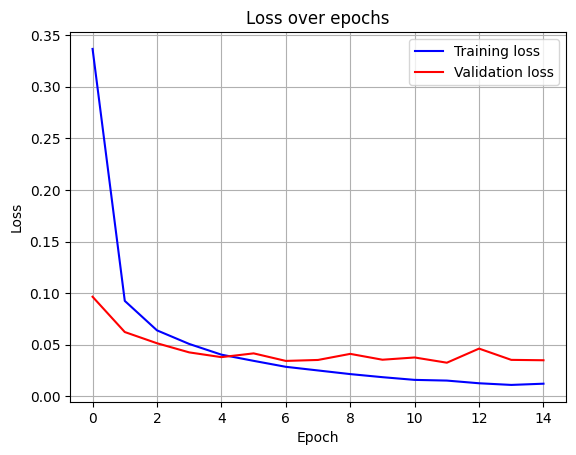


Test Accuracy: 99.05%



In [15]:
# 📌 필요한 라이브러리 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 📌 LeNet-5 모델 정의
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)     # C1
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)    # C3
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5)  # C5
        self.fc1 = nn.Linear(120, 84)                   # F6
        self.fc2 = nn.Linear(84, 10)                    # Output

    def forward(self, x):
        x = F.avg_pool2d(F.relu(self.conv1(x)), 2)  # C1 → ReLU → S2
        x = F.avg_pool2d(F.relu(self.conv2(x)), 2)  # C3 → ReLU → S4
        x = F.relu(self.conv3(x))                   # C5
        x = x.view(-1, 120)                         # Flatten
        x = F.relu(self.fc1(x))                     # F6
        x = self.fc2(x)                             # Output
        return x

# 📌 MNIST 데이터셋 불러오기
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# 📌 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 📌 MNIST 이미지 프리뷰 함수
def show_mnist_examples(dataset):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4))
    for i in range(40):
        image, label = dataset[i]
        ax = axes[i // 10, i % 10]
        ax.imshow(image.squeeze(), cmap='gray')
        ax.set_title(str(label), fontsize=8)
        ax.axis('off')
    plt.suptitle('MNIST Dataset - preview', fontsize=14)
    plt.tight_layout()
    plt.show()

show_mnist_examples(train_dataset)

# 📌 학습 루프 + Loss 저장
train_losses = []
val_losses = []

for epoch in range(15):
    model.train()
    running_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 검증
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(test_loader)
    val_losses.append(avg_val_loss)

    print(f'Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}')

# 📌 Loss 그래프 출력
plt.plot(train_losses, label='Training loss', color='blue')
plt.plot(val_losses, label='Validation loss', color='red')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 📌 테스트 정확도 계산
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print(f'\nTest Accuracy: {100 * correct / total:.2f}%\n')

test(model, test_loader)
